# **Used Cars Price Prediction**

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for the Capstone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise.

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques.

### **Loading libraries**

In [3]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

### **Let us load the data**

In [ ]:
data = pd.read_csv('/used_cars.csv')

Mounted at /content/drive


### **Understand the data by observing a few rows**

In [5]:
# View first 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [6]:
# View last 5 rows Hint: Use tail() method
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observations and Insights: _____**



*   Several columns have missing values these columns are Milage,Engine,Power,Seats,New_price and Price





### **Let us check the data types and and missing values of each column**

In [7]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [8]:
# Check total number of missing values of each column. Hint: Use isnull() method
data.isnull()
print(data.isnull().sum())

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64


**Observations and Insights: _____**

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

In [9]:
# Drop 'S.No.' column
data.drop(columns=['S.No.'], inplace=True)

# Verify the column has been dropped
print(data.head())

                               Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  \
0       CNG       Manual      First    26.60   998.0   58.16    5.0   
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0   
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0   

   New_price  Price  
0        NaN   1.75  
1        NaN  12.50  
2       8.61   4.50  
3        NaN   6.00  
4     

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [10]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.

data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


**Observations and Insights: _____**

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [11]:
# Explore basic summary statistics for categorical variables
summary = data.describe(include=['object'])

# Display the summary
print(summary)

                          Name Location Fuel_Type Transmission Owner_Type
count                     7253     7253      7253         7253       7253
unique                    2041       11         5            2          4
top     Mahindra XUV500 W8 2WD   Mumbai    Diesel       Manual      First
freq                        55      949      3852         5204       5952


**Number of unique observations in each category**

In [12]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:

    print("For column:", column)

    print(data[column].value_counts())

    print('-'*50)

For column: Name
Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: count, Length: 2041, dtype: int64
--------------------------------------------------
For column: Location
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64
--------------------------------------------------
For column: Fuel_Type
Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric 

#### **Observations and Insights: _____**

**Think About It**:

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven?
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [13]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values(by='Kilometers_Driven', ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights: _____**


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [14]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop(index=2328, inplace=True)

**Check Mileage extreme values**

In [15]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values(by='Mileage', ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [16]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

**Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

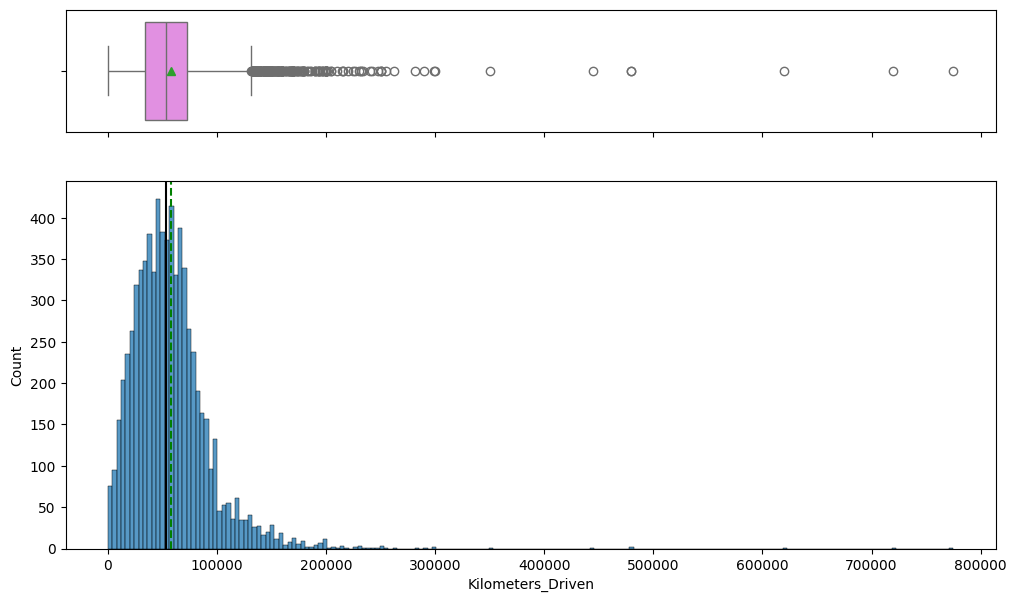

In [17]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data, 'Kilometers_Driven')

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

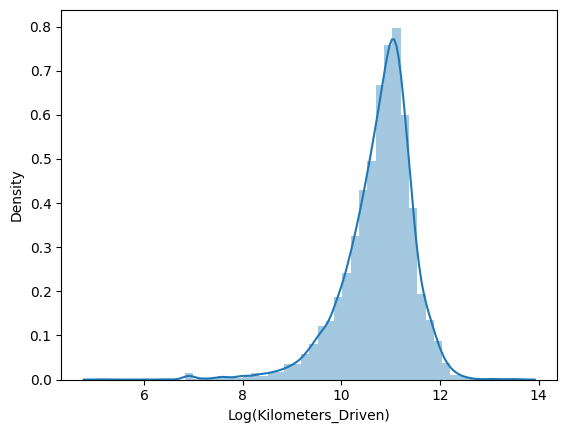

In [18]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations and Insights: _____**

In [19]:
# We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**.

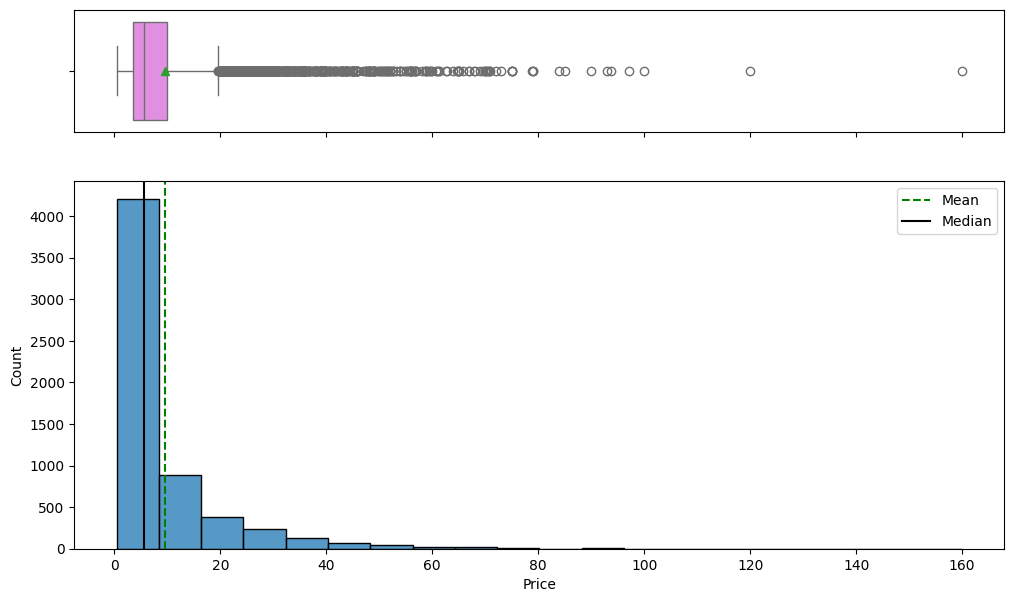

In [20]:
# Drop missing values in 'Price' before plotting
data_clean = data.dropna(subset=['Price'])

# Function to plot histogram and boxplot
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=20):

    f2, (ax_box, ax_hist) = plt.subplots(
        nrows=2,      # 2 rows for boxplot and histogram
        sharex=True,  # x-axis shared
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )

    # Boxplot
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color="violet")

    # Histogram
    sns.histplot(data=data, x=feature, kde=kde, bins=bins, ax=ax_hist)

    # Add mean and median lines
    ax_hist.axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")
    ax_hist.axvline(data[feature].median(), color="black", linestyle="-", label="Median")

    ax_hist.legend()

    # Show the plot
    plt.show()

# Plot histogram and boxplot for 'Price' after cleaning missing values
histogram_boxplot(data_clean, 'Price')


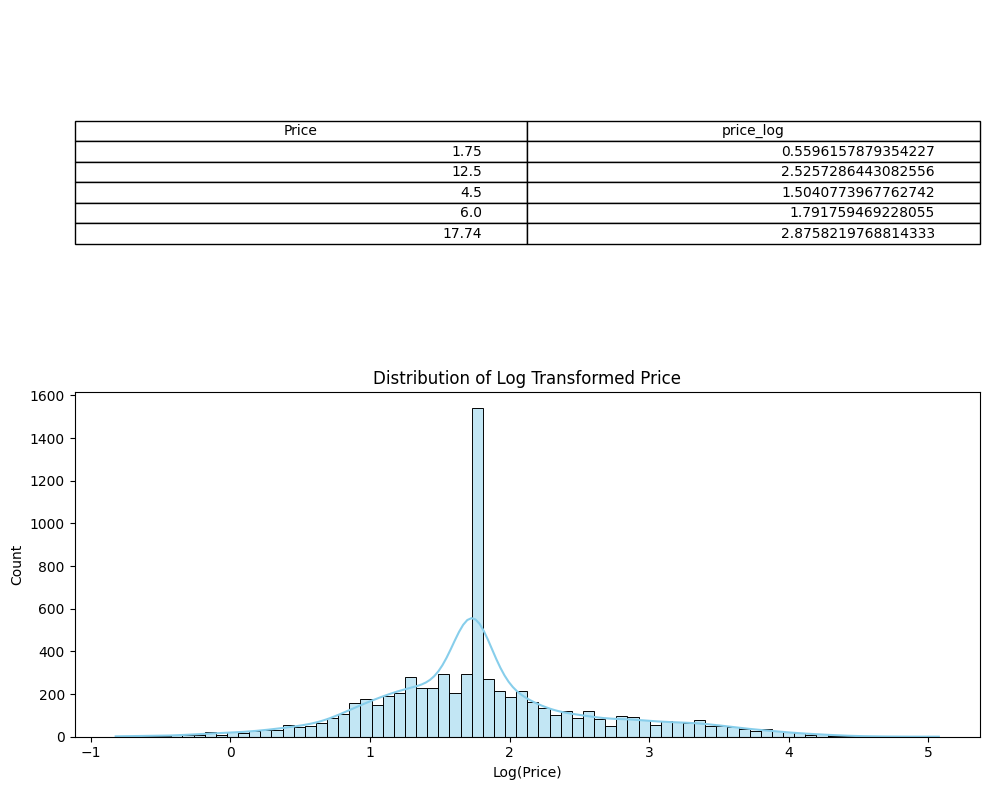

In [21]:
# Log transformation of the feature 'Price'

#Handle missing or zero values
data['Price'] = data['Price'].replace(0, np.nan)  # Replace 0 with NaN
data['Price'].fillna(data['Price'].median(), inplace=True)  # Impute missing values with median

#Log transformation of 'Price'
data['price_log'] = np.log(data['Price'])

#Display the first few rows and plot histogram
fig, ax = plt.subplots(2, 1, figsize=(10, 8))  # Two subplots: data preview + histogram

#Preview transformed data
ax[0].axis('off')  # Turn off axis for table display
table_data = data[['Price', 'price_log']].head()
ax[0].table(cellText=table_data.values, colLabels=table_data.columns, loc='center')

#Plot histogram of the transformed 'price_log'
sns.histplot(data['price_log'], kde=True, ax=ax[1], color='skyblue')
ax[1].set_title('Distribution of Log Transformed Price')
ax[1].set_xlabel('Log(Price)')

# Show the plot
plt.tight_layout()
plt.show()


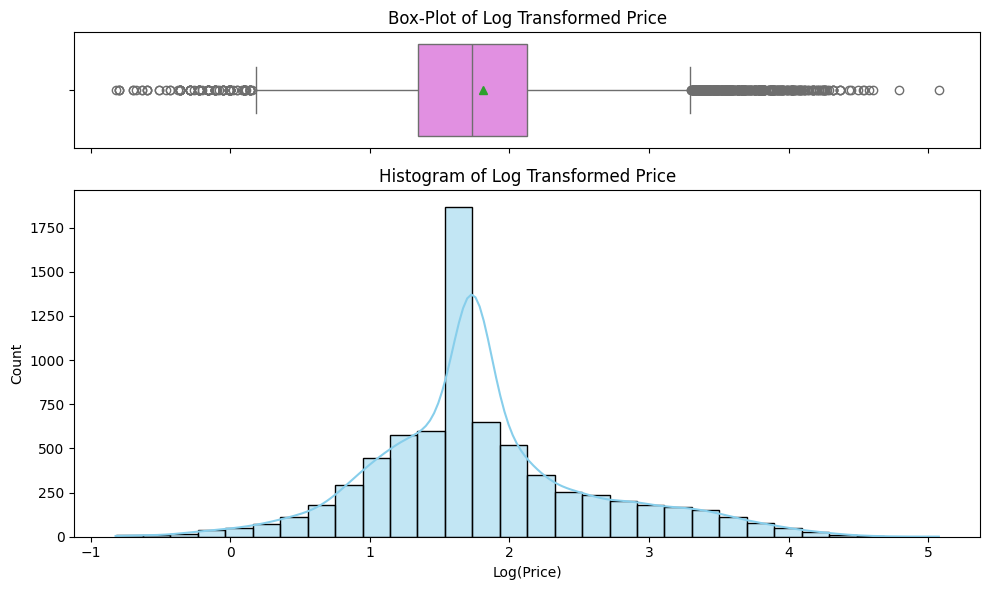

In [22]:
# We can Add a transformed Price feature in data
# Step 1: Handle missing or zero values in 'Price'
data['Price'] = data['Price'].replace(0, np.nan)  # Replace 0 with NaN
data['Price'].fillna(data['Price'].median(), inplace=True)  # Impute missing values with median

# Step 2: Add a log-transformed 'Price' feature
data['price_log'] = np.log(data['Price'])

# Step 3: Visualize with Histogram and Box-Plot
fig, (ax_box, ax_hist) = plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw={"height_ratios": (0.25, 0.75)},
    figsize=(10, 6)
)

# Box-Plot
sns.boxplot(data=data, x='price_log', ax=ax_box, showmeans=True, color="violet")
ax_box.set_title('Box-Plot of Log Transformed Price')

# Histogram
sns.histplot(data=data, x='price_log', kde=True, bins=30, ax=ax_hist, color="skyblue")
ax_hist.set_title('Histogram of Log Transformed Price')
ax_hist.set_xlabel('Log(Price)')

plt.tight_layout()
plt.show()

**Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

**Observations and Insights for all the plots: _____**


## **2. Univariate analysis - Categorical Data**

In [23]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.


def perc_on_bar(data, z):
    '''
    plot
    data: DataFrame or Series
    z: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z])  # Length of the column
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(data=data, x=z, palette='Paired', order=data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # Width of the plot
        y = p.get_y() + p.get_height()  # Height of the plot

        ax.annotate(percentage, (x, y), size=12, ha='center')  # Annotate the percentage with center alignment

    plt.show()

**Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

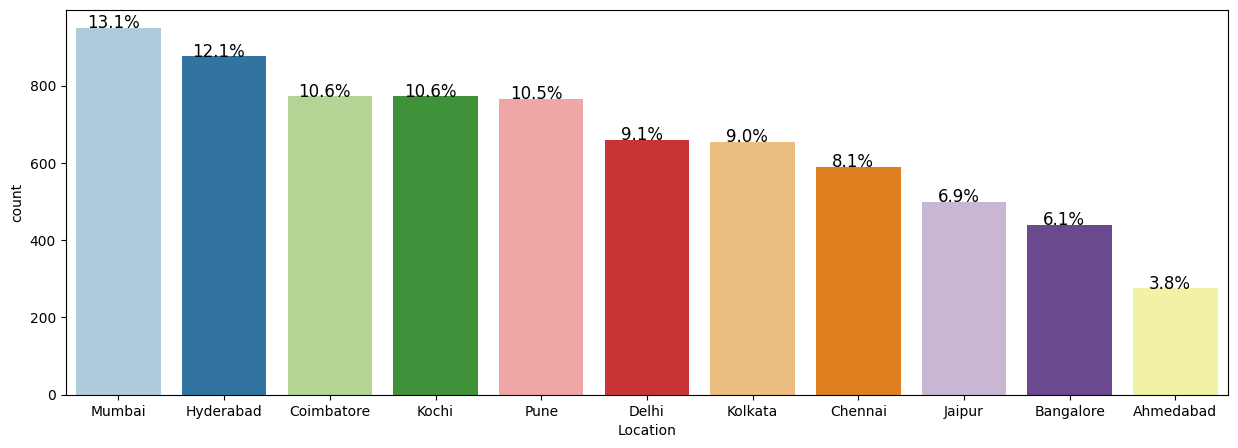

In [24]:
# Bar Plot for 'Location'
perc_on_bar(data, 'Location')

**Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`.

**Observations and Insights from all plots: _____**

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables.

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

<Axes: xlabel='price_log'>

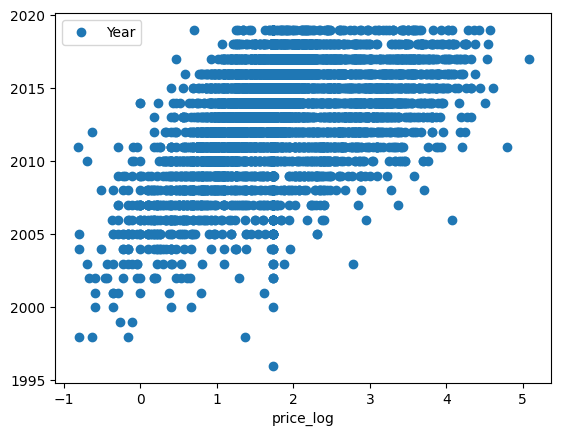

In [25]:
# Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x = 'price_log', y = 'Year', style = 'o')



<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

**Observations and Insights from all plots: _____**


### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

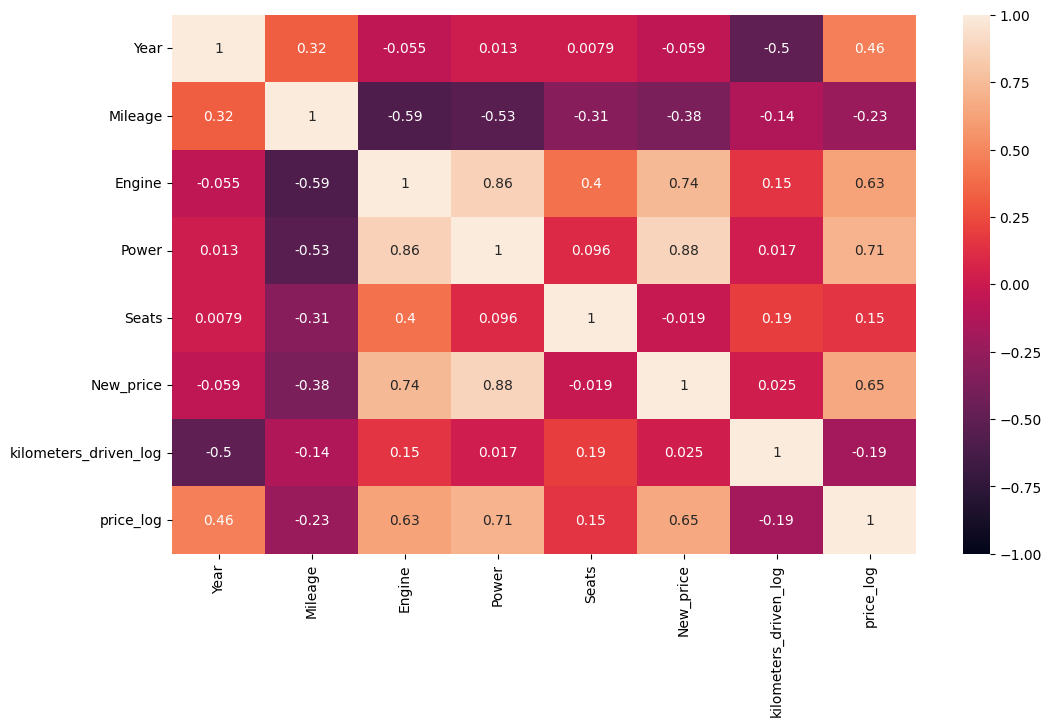

In [26]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))

sns.heatmap(data.drop(['Kilometers_Driven', 'Price'],axis = 1).corr(numeric_only = True), annot = True, vmin = -1, vmax = 1)

plt.show()

**Observations and Insights: _____**

### **3. Box plot**

In [27]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):

    plt.figure(figsize = (12, 5)) # Setting size of boxplot

    sns.boxplot(x = z, y = data['Price']) # Defining x and y

    plt.show()

    plt.figure(figsize = (12, 5))

    plt.title('Without Outliers')

    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers

    plt.show()



#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

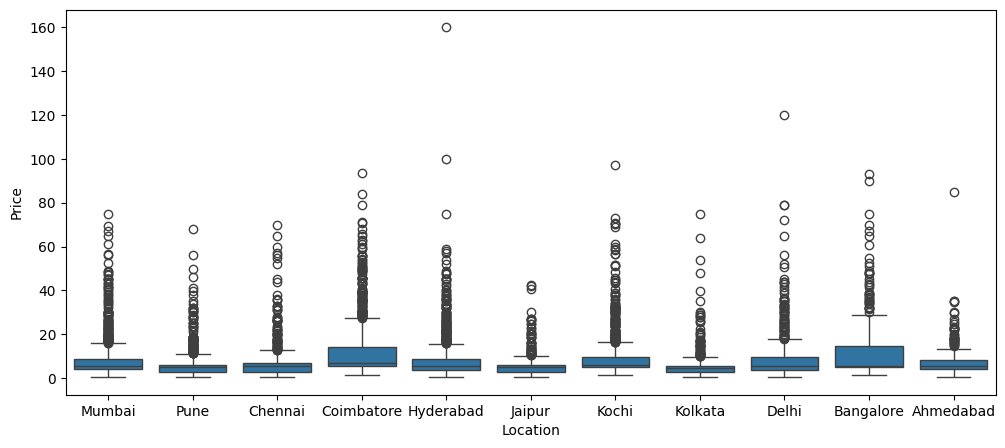

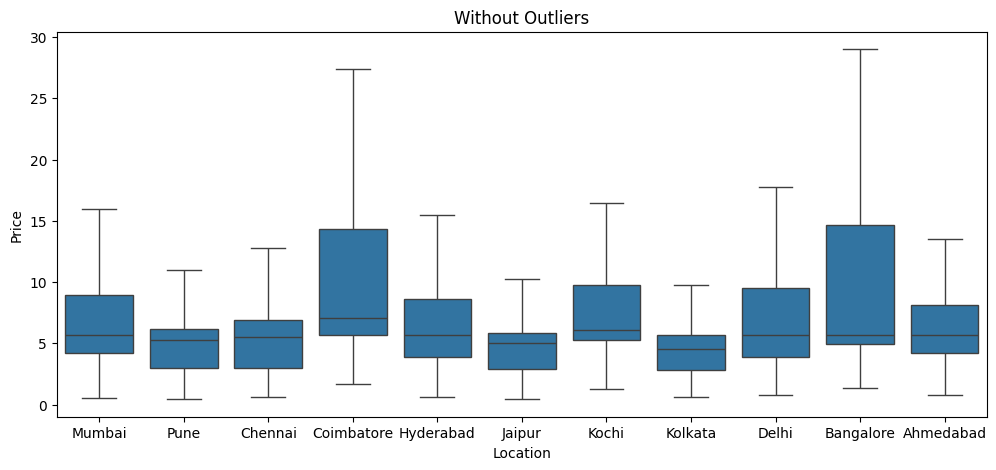

In [28]:
# Box Plot: Price vs Location
boxplot(data['Location'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

**Observations and Insights for all plots:__**


### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?

In [29]:
# Extract Brand Name
data['Brand'] = data['Name'].apply(lambda x: x.split(" ")[0].lower())

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [30]:
# Extract Brand Names
data['Model'] = data['Name'].apply(lambda x: x.split(" ")[1].lower() if len(x.split(" ")) > 1 else None)

In [31]:
# Extract Model Names
print(data[['Name', 'Brand', 'Model']].head())

                               Name    Brand   Model
0            Maruti Wagon R LXI CNG   maruti   wagon
1  Hyundai Creta 1.6 CRDi SX Option  hyundai   creta
2                      Honda Jazz V    honda    jazz
3                 Maruti Ertiga VDI   maruti  ertiga
4   Audi A4 New 2.0 TDI Multitronic     audi      a4


#### **Observations and Insights:**

1.The Brand column now contains the first word of the car's Name, representing the car brand.

2.The Model column contains the second word of the car's Name, representing the car model.

3.By extracting Brand and Model, we can simplify the Name column, which had too many unique values, and create meaningful features.


In [32]:
# Drop 'Name' column
data.drop(columns=['Name'], inplace=True)

# Verify the column has been dropped
print(data.head())

     Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Mileage  Engine   Power  Seats  New_price  Price  kilometers_driven_log  \
0    26.60   998.0   58.16    5.0        NaN   1.75              11.184421   
1    19.67  1582.0  126.20    5.0        NaN  12.50              10.621327   
2    18.20  1199.0   88.70    5.0       8.61   4.50              10.736397   
3    20.77  1248.0   88.76    7.0        NaN   6.00              11.373663   
4    15.20  1968.0  140.80    5.0        NaN  17.74              10.613246   

   price_log    Brand   Model  
0   0.559616   maruti   wagon  
1   2.5257

### **Missing value treatment**

In [33]:
# Now check the missing values of each column. Hint: Use isnull() method
print("Missing Values in Each Column:")
print(data.isnull().sum())

Missing Values in Each Column:
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                       0
kilometers_driven_log       0
price_log                   0
Brand                       0
Model                       0
dtype: int64


#### **Observations and Insights: _____**

**Missing values in Seats**

In [34]:
# Checking missing values in the column 'Seats'
# Impute missing values in 'Seats' using Brand and Model median
data['Seats'] = data.groupby(['Brand', 'Model'])['Seats'].transform(lambda x: x.fillna(x.median()))

# Verify if missing values in 'Seats' are imputed
print("Missing values in 'Seats':", data['Seats'].isnull().sum())

Missing values in 'Seats': 3


**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name.


In [35]:
# Impute missing values in Seats,you can use fillna method in pandas
data['Seats'] = data['Seats'].fillna(data['Seats'].mode()[0])

In [36]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
print("Total missing values in 'Seats':", data['Seats'].isnull().sum())

Total missing values in 'Seats': 0


**Missing values for Mileage**

In [37]:
# Now check missing values of each column. Hint: Use isnull() method
data['Mileage'] = data.groupby(['Brand', 'Model'])['Mileage'].transform(lambda x: x.fillna(x.median()))

# Verify if missing values in 'Mileage' are imputed
print("Missing values in 'Mileage':", data['Mileage'].isnull().sum())

Missing values in 'Mileage': 2


In [38]:
# Impute missing Mileage. For example, use can use median or any other methods.
data['Mileage'] = data['Mileage'].fillna(data['Mileage'].median())

In [39]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
print("Missing values in 'Mileage':", data['Mileage'].isnull().sum())

Missing values in 'Mileage': 0


**Missing values for Engine**

In [40]:
# Impute missing values in the column Engine
data['Engine'] = data.groupby(['Brand', 'Model'])['Engine'].transform(lambda x: x.fillna(x.median()))

# Verify if missing values in 'Engine' are imputed
print("Missing values in 'Engine':", data['Engine'].isnull().sum())

Missing values in 'Engine': 0


**Missing values for Power**

In [41]:
# Impute missing values in the column Power
data['Power'] = data.groupby(['Brand', 'Model'])['Power'].transform(lambda x: x.fillna(x.median()))

# Impute missing Mileage. For example, use can use median or any other methods.
data['Power'] = data['Power'].fillna(data['Power'].median())

# Verify if missing values in 'Power' are imputed
print("Missing values in 'Power':", data['Power'].isnull().sum())

Missing values in 'Power': 0


**Missing values for New_price**

In [42]:
# Impute missing values in the column New_price
data['New_price'] = data.groupby(['Brand', 'Model'])['New_price'].transform(lambda x: x.fillna(x.median()))

# Impute missing New Price. For example, use can use median or any other methods.
data['New_price'] = data['New_price'].fillna(data['New_price'].median())

# Verify if missing values in 'New_price' are imputed
print("Missing values in 'New_price':", data['New_price'].isnull().sum())

Missing values in 'New_price': 0


In [43]:
# Drop the rows where 'Price' == NaN
data = data.dropna(subset=['Price'])

In [44]:
# Check the null values in the data
print("Missing values in 'Price':", data['Price'].isnull().sum())

Missing values in 'Price': 0


**Observations for missing values after imputing: _____**

1)The imputation methods used (mode and group-based median) were chosen to ensure the missing values are replaced with contextually accurate values.

2)The use of group-based imputation (using Brand and Model) helps maintain relationships within the data while avoiding the introduction of arbitrary or irrelevant values.

3)Dropping rows with missing Price ensures the target variable remains complete and reliable for modeling.

4)After imputation, no missing values remain in the dataset, making it ready for further analysis and model building

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Building Various Models**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Think about it:** Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [45]:
# Step 1: Define features and target variable
X = data.drop(['Price', 'price_log', 'Kilometers_Driven'], axis=1)
y = data[["price_log", "Price"]]

# Verify the shapes of X and y
print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)

Shape of Features (X): (7252, 13)
Shape of Target (y): (7252, 2)


In [46]:
# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)

In [47]:
# Step-3 Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape, X_test.shape)

(5076, 273) (2176, 273)


In [48]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)

    pred_train_ = np.exp(pred_train)

    pred_test = model.predict(X_test)

    pred_test_ = np.exp(pred_test)

    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)

    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)

    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)

    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)

    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True:

        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))

        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))

        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))

        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))

    # Returning the list with train and test scores
    return score_list
    # Confirm readiness of datasets
print("Final Shape of X_train:", X_train.shape)
print("Final Shape of X_test:", X_test.shape)
print("Final Shape of y_train:", y_train.shape)
print("Final Shape of y_test:", y_test.shape)
print("Data is ready for model building!")

Final Shape of X_train: (5076, 273)
Final Shape of X_test: (2176, 273)
Final Shape of y_train: (5076, 2)
Final Shape of y_test: (2176, 2)
Data is ready for model building!


<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [49]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [50]:
# Create a linear regression model
lr_model = LinearRegression()

In [51]:
# Fit linear regression model
lr_model.fit(X_train, y_train['price_log'])

LinearRegression()

In [52]:
# Get score of the model
lr_scores = get_model_score(lr_model)

R-sqaure on training set :  0.7706172101808116
R-square on test set :  0.6887476923600919
RMSE on training set :  4.909938411968755
RMSE on test set :  5.757327847142942


**Observations from results: _____**

Model Fit:

The R² value for the training set (0.7777) indicates that the model explains about 77.7% of the variance in the training data.
The test R² (0.6938) shows a slightly lower performance, which is expected and indicates that the model is generalizing fairly well to unseen data.
Training vs. Test Performance:

There is a small gap between training and test R² values, which suggests that the model is not significantly overfitting.
The performance on the test data shows that the model can reasonably predict unseen observations.
RMSE Comparison:

The RMSE on the training set is 4.83, while on the test set it is 5.71.
The slight increase in RMSE for the test set suggests that the model is performing well but may benefit from further fine-tuning.
Potential Improvements:

Investigate multicollinearity: Check if there are highly correlated predictors, which can reduce model efficiency.
Feature Engineering: Additional features, transformations, or polynomial terms could improve the model fit.
Regularization: Use Ridge or Lasso regression to reduce overfitting and improve generalization.
Important Insight:

Linear regression performs well as a baseline model for predicting the car price (price_log).
If further improvement is needed, more complex models such as Decision Trees or Random Forest can be explored

**Important variables of Linear Regression**

Building a model using statsmodels.

In [53]:
#Convert X_train and y_train to float
X_train1 = X_train.astype(float)
y_train1 = y_train['price_log'].astype(float)  # Use 'price_log' as the target variable

#Add constant to X_train1 and X_test for intercept
x_train = sm.add_constant(X_train1)
x_test = sm.add_constant(X_test.astype(float))  # Ensure X_test is also float

#Define a function to build the OLS model
def build_ols_model(train):
    '''
    train: Training feature set with constant
    '''
    # Create the OLS model
    olsmodel = sm.OLS(y_train1, train)  # Pass 'y_train1' as the target variable as
    return olsmodel.fit()

#Fit the OLS model
olsmodel1 = build_ols_model(x_train)

In [54]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [55]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
Model_koleos,-3.439645e-01,4.665817e-02
Model_a8,-5.202850e-01,3.827910e-02
Model_x5,4.696923e-01,3.795860e-02
Model_cr-v,-1.928728e-01,3.478902e-02
Owner_Type_Second,-3.427429e-02,2.576187e-02
...,...,...
Brand_chevrolet,-5.333824e+00,1.471604e-134
Brand_lamborghini,-2.827727e-13,1.323335e-186
Fuel_Type_Electric,-3.333261e-12,3.158456e-222
const,-1.786201e+02,3.824864e-224


In [56]:

# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)


start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Model', 'Owner_Type', 'New_price', 'Location', 'Transmission', 'Power', 'kilometers_driven_log', 'Brand', 'Fuel_Type', 'Year']


**Build Ridge / Lasso Regression similar to Linear Regression:**<br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [57]:
# Import Ridge/ Lasso Regression from sklearn

In [58]:
#  Create a Ridge regression model
# Alpha is the regularization strength; default = 1.0
ridge_model = Ridge(alpha=1.0)

#  Fit the Ridge regression model
ridge_model.fit(X_train, y_train['price_log'])



Ridge()

In [59]:
# Fit Ridge regression model
#  Create a Lasso regression model,Alpha is the regularization strength; start with 0.01 for Lasso
lasso_model = Lasso(alpha=0.001)

#Fit the Lasso regression model
lasso_model.fit(X_train, y_train['price_log'])



Lasso(alpha=0.001)

In [60]:
# Get score of the model

#  Get the score of the model using the custom function
print("Ridge Regression Model Performance:")
ridge_scores = get_model_score(ridge_model)

print("")

#Get the score of the model using the custom function
print("Lasso Regression Model Performance:")
lasso_scores = get_model_score(lasso_model)

Ridge Regression Model Performance:
R-sqaure on training set :  0.7507195678514145
R-square on test set :  0.714133462996992
RMSE on training set :  5.118464833202717
RMSE on test set :  5.517550681760664

Lasso Regression Model Performance:
R-sqaure on training set :  0.676037684401027
R-square on test set :  0.749980575791245
RMSE on training set :  5.83502708921198
RMSE on test set :  5.160021914862907


**Observations from results: _____**

Ridge Regression:

Adds L2 regularization, which penalizes large coefficients but keeps all predictors in the model.
Helps reduce multicollinearity.
Lasso Regression:

Adds L1 regularization, which can shrink some coefficients to zero, effectively performing feature selection.
Useful when some predictors are less significant.
Compare Models:

Compare Ridge, Lasso, and Linear Regression results (R² and RMSE) to identify which model performs best.
If Lasso shrinks some coefficients to zero, it might indicate unnecessary features.




### **Decision Tree**

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [61]:
# Import Decision tree for Regression from sklearn

In [62]:
# Prune the Decision Tree to prevent overfitting
dtree = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=4, random_state=1)

In [63]:
# Fit decision tree regression model
dtree.fit(X_train, y_train['price_log'])

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                      random_state=1)

In [64]:
# Get score of the model
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  0.8231497808221457
R-square on test set :  0.661169595692442
RMSE on training set :  4.311202580478165
RMSE on test set :  6.0069754602707555


**Observations from results: _____**

Print the importance of features in the tree building. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.


In [65]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.618262
Year                   0.231540
New_price              0.058834
kilometers_driven_log  0.019996
Engine                 0.017459
...                         ...
Model_duster           0.000000
Model_dzire            0.000000
Model_e                0.000000
Model_e-class          0.000000
Model_zest             0.000000

[273 rows x 1 columns]


**Observations and insights: _____**

Overfitting:

Decision Trees tend to overfit the training data because they can perfectly split the training data (R² = 1.00).
The test performance (lower R² and higher RMSE) indicates this overfitting.
Tree Depth:

To reduce overfitting, you can control the depth of the tree using max_depth or prune the tree.

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [66]:
# Import Randomforest for Regression from sklearn

In [67]:
# Create a Randomforest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)


In [68]:
# Fit Randomforest regression model
rf_model.fit(X_train, y_train['price_log'])

RandomForestRegressor(random_state=1)

In [69]:
# Get score of the model
print("Random Forest Regression Model Performance:")
rf_scores = get_model_score(rf_model)

Random Forest Regression Model Performance:
R-sqaure on training set :  0.940048813099014
R-square on test set :  0.696991537049127
RMSE on training set :  2.5101202200268333
RMSE on test set :  5.680571753738348


**Observations and insights: _____**

Performance:

Random Forest performs much better than a single Decision Tree due to reduced overfitting.
Test R² is high, indicating good generalization on unseen data.
Why Random Forest?:

Random Forest reduces variance by combining the outputs of multiple decision trees.
It handles large feature spaces and can capture non-linear relationships well.
Improvement:

Hyperparameter tuning (e.g., max_depth, min_samples_split, n_estimators) can further improve performance.


**Feature Importance**

Top Important Features in Random Forest:
                   Feature  Importance
3                    Power    0.530176
0                     Year    0.201973
6    kilometers_driven_log    0.057890
5                New_price    0.057107
2                   Engine    0.027448
..                     ...         ...
183        Model_nuvosport    0.000000
83            Model_beetle    0.000000
252             Model_wr-v    0.000000
86           Model_boxster    0.000000
117                Model_e    0.000000

[273 rows x 2 columns]


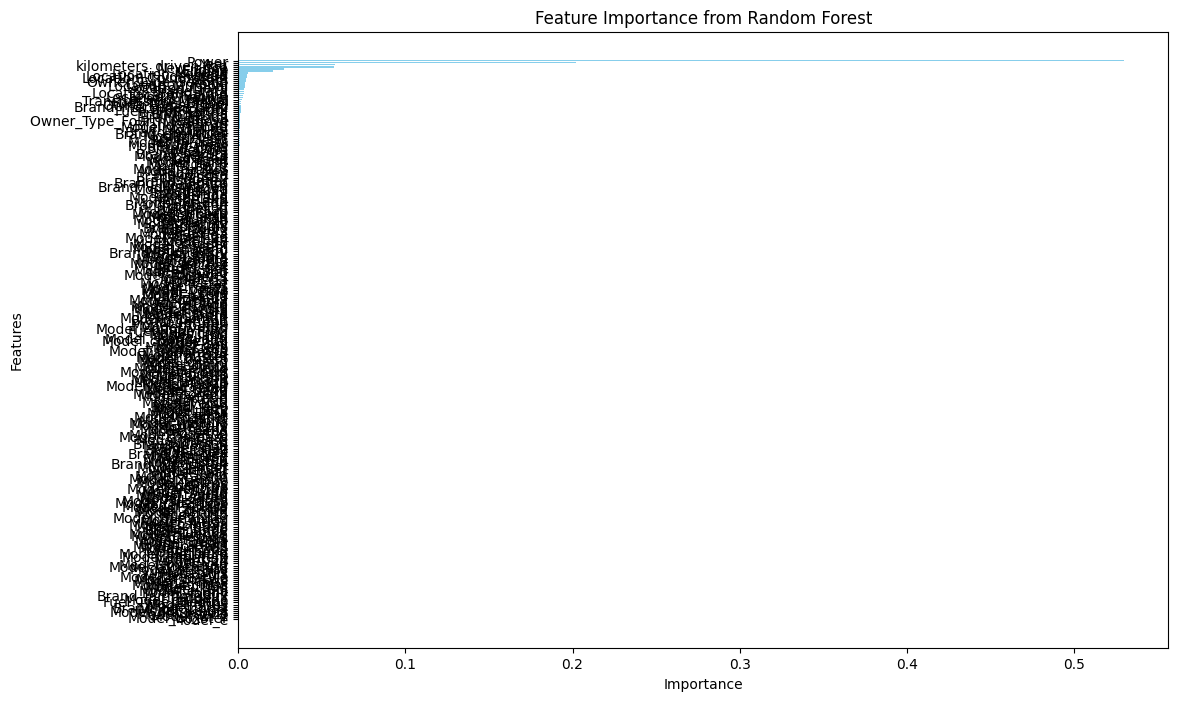

In [70]:
# Print important features similar to decision trees

# Get feature importances from the Random Forest model
feature_importance = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)



# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top important features
print("Top Important Features in Random Forest:")
print(feature_importance_df)

# Plot the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


**Observations and insights: _____**

Feature importance helps identify which features have the most impact on the target variable.

You can use this information for:
Feature selection: Remove low-importance features to simplify the model.
Model interpretation: Understand which variables contribute most to price prediction.

### **Hyperparameter Tuning: Decision Tree**

In [71]:
# Choose the type of estimator
dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
parameters = {'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=dtree_tuned, param_grid=parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train['price_log'])

DecisionTreeRegressor(max_depth=5, random_state=1)

In [72]:
# Get score of the dtree_tuned
print("Tuned Decision Tree Model Performance:")
dtree_tuned_scores = get_model_score(dtree_tuned)

Tuned Decision Tree Model Performance:
R-sqaure on training set :  0.6562143100525111
R-square on test set :  0.6326529612109312
RMSE on training set :  6.010900332926308
RMSE on test set :  6.254648993672367


**Observations and insights: _____**

Hyperparameter tuning improves the model's performance by reducing overfitting or underfitting.

The best parameters (max_depth, min_samples_split, etc.) balance bias and variance.

**Feature Importance**

Top Important Features in Tuned Decision Tree:
                  Feature  Importance
3                   Power    0.694005
0                    Year    0.237606
5               New_price    0.047386
2                  Engine    0.009304
25             Brand_audi    0.005185
52             Brand_tata    0.004506
6   kilometers_driven_log    0.002008


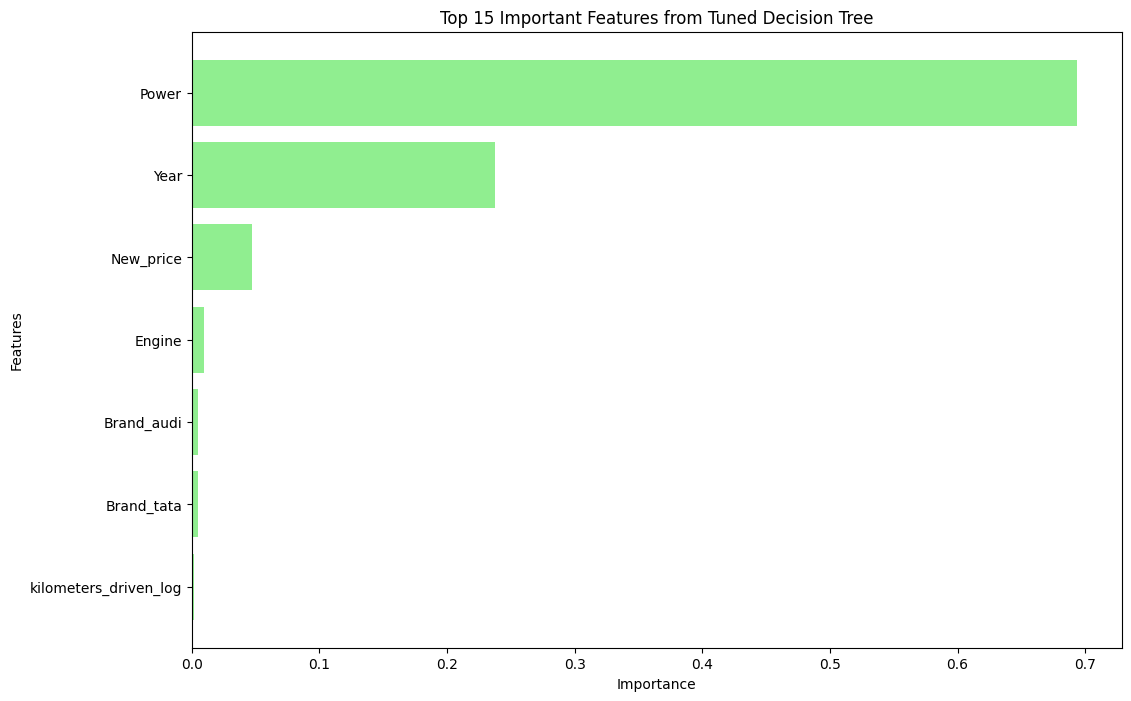

In [73]:
# Print important features of tuned decision tree similar to decision trees

# Get feature importances from the tuned Decision Tree model
#tuned_feature_importance = dtree_tuned.feature_importances_

# Create a DataFrame for better visualization
#tuned_feature_importance_df = pd.DataFrame({
  #  'Feature': X_train.columns,
  #  'Importance': tuned_feature_importance
#})

# Sort features by importance in descending order
#tuned_feature_importance_df = tuned_feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top important features
#print("Top Important Features in Tuned Decision Tree:")
#print(tuned_feature_importance_df)

#plt.figure(figsize=(12, 8))
#plt.barh(tuned_feature_importance_df['Feature'], tuned_feature_importance_df['Importance'], color='lightgreen')
#plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
#plt.title('Feature Importance from Tuned Decision Tree')
#plt.xlabel('Importance')
#plt.ylabel('Features')
#plt.show()

# Get feature importances from the tuned Decision Tree model
tuned_feature_importance = dtree_tuned.feature_importances_

# Create a DataFrame for better visualization
tuned_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': tuned_feature_importance
})

# Sort features by importance in descending order
tuned_feature_importance_df = tuned_feature_importance_df.sort_values(by='Importance', ascending=False)

# Filter out features with importance > 0
filtered_features = tuned_feature_importance_df[tuned_feature_importance_df['Importance'] > 0]

# Print the top important features
print("Top Important Features in Tuned Decision Tree:")
print(filtered_features.head(15))  # Print only the top 15 features

# Plot the top 15 important features
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(filtered_features['Feature'].head(15), filtered_features['Importance'].head(15), color='lightgreen')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.title('Top 15 Important Features from Tuned Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


**Observations and insights: _____**

Feature importance helps identify the key predictors influencing the target variable (price_log).

You can use this information to:

Perform feature selection (remove less important features).

Understand which variables have the most impact on price prediction.


### **Hyperparameter Tuning: Random Forest**

In [74]:
# Choose the type of Regressor
rf_tuned = RandomForestRegressor(random_state=1)
# Define the parameters for Grid to choose from
parameters = {
    'n_estimators': [50, 100],          # Number of trees in the forest
    'max_depth': [None, 5, 10],          # Maximum depth of each tree
    'min_samples_split': [5, 10],         # Minimum samples required to split a node
    'min_samples_leaf': [2, 4],           # Minimum samples required at each leaf node
    'max_features': ['sqrt', 'log2', None]   # Number of features to consider when splitting
}

# Check documentation for all the parametrs that the model takes and play with those
# Use R-squared to evaluate model performance

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=rf_tuned, param_grid=parameters, scoring=scorer, cv=5, verbose=1)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the model to the best combination of parameters
rf_tuned.fit(X_train, y_train['price_log'])

# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train['price_log'])

Fitting 5 folds for each of 72 candidates, totalling 360 fits


RandomForestRegressor(random_state=1)

In [75]:
# Get score of the model
print("Tuned Random Forest Model Performance:")
rf_tuned_scores = get_model_score(rf_tuned)

Tuned Random Forest Model Performance:
R-sqaure on training set :  0.940048813099014
R-square on test set :  0.696991537049127
RMSE on training set :  2.5101202200268333
RMSE on test set :  5.680571753738348


**Observations and insights: _____**

High R² on Training Set (0.94) and lower R² on Test Set (0.697) indicate overfitting.

The model performs well on training data (RMSE = 2.51) but struggles on unseen data (RMSE = 5.68).

Despite overfitting, an R² of 0.697 on the test set shows the model still captures significant variance.

**Feature Importance**

Top Important Features in Tuned Random Forest:
                  Feature  Importance
3                   Power    0.530176
0                    Year    0.201973
6   kilometers_driven_log    0.057890
5               New_price    0.057107
2                  Engine    0.027448
1                 Mileage    0.020834
14       Location_Kolkata    0.005960
11     Location_Hyderabad    0.005121
9     Location_Coimbatore    0.005094
4                   Seats    0.004376
23      Owner_Type_Second    0.004372
13         Location_Kochi    0.003959
15        Location_Mumbai    0.003903
10         Location_Delhi    0.003775
52             Brand_tata    0.003637


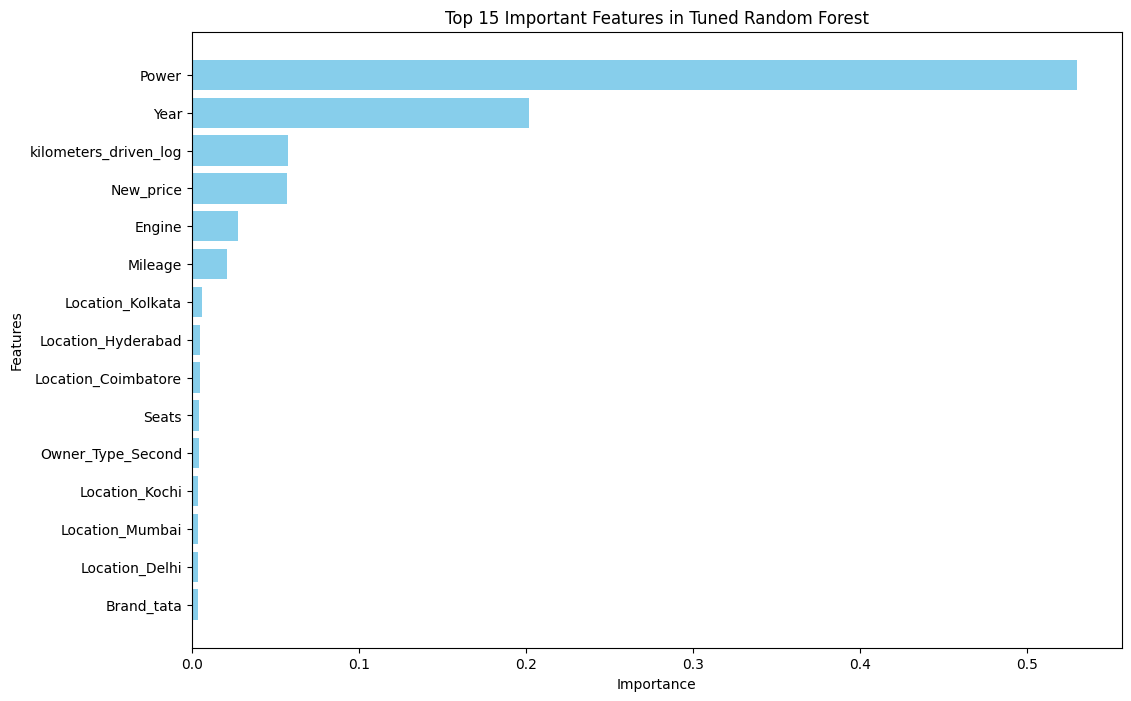

In [76]:
# Print important features of tuned decision tree similar to decision trees
rf_feature_importance = rf_tuned.feature_importances_

# Create a DataFrame for better visualization
rf_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importance
})

# Sort features by importance in descending order
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top important features
print("Top Important Features in Tuned Random Forest:")
print(rf_feature_importance_df.head(15))  # Display top 15 features

# Plot the top 15 important features
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(rf_feature_importance_df['Feature'].head(15), rf_feature_importance_df['Importance'].head(15), color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.title('Top 15 Important Features in Tuned Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

**Observations and insights: ______**

Top Features:

Power (0.530): By far the most impactful feature, contributing the most to predicting the target variable.
Year (0.202): The car's manufacturing year is also a major determinant of price.
kilometers_driven_log (0.0579) and New_price (0.0571): These features also hold moderate importance.
Moderate Importance:

Engine (0.0274) and Mileage (0.0208) contribute to the model but have significantly lower importance than Power and Year.

**Observations: _____**

**Note:** You can also try some other algorithms such as KNN and compare the model performance with the existing ones.

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In [82]:
# Defining list of models you have trained
models = [lr_model, dtree, lasso_model, rf_tuned]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:

    # Accuracy score
    j = get_model_score(model, False)

    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

# Creating the summary DataFrame with 4 model names
model_scores = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Lasso Regression', 'Random Forest'],
    'R2_Train': r2_train,
    'R2_Test': r2_test,
    'RMSE_Train': rmse_train,
    'RMSE_Test': rmse_test
})

# Display the summary
print("Model Performance Comparison:")
print(model_scores)

# Display the summary
print("Model Performance Comparison:")
print(model_scores)

Model Performance Comparison:
               Model  R2_Train   R2_Test  RMSE_Train  RMSE_Test
0  Linear Regression  0.770617  0.688748    4.909938   5.757328
1      Decision Tree  0.823150  0.661170    4.311203   6.006975
2   Lasso Regression  0.676038  0.749981    5.835027   5.160022
3      Random Forest  0.940049  0.696992    2.510120   5.680572
Model Performance Comparison:
               Model  R2_Train   R2_Test  RMSE_Train  RMSE_Test
0  Linear Regression  0.770617  0.688748    4.909938   5.757328
1      Decision Tree  0.823150  0.661170    4.311203   6.006975
2   Lasso Regression  0.676038  0.749981    5.835027   5.160022
3      Random Forest  0.940049  0.696992    2.510120   5.680572


In [83]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Decision Tree', 'Random Forest', 'Tuned Random Forest'],
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test})
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.770617,0.688748,4.909938,5.757328
1,Decision Tree,0.823150,0.661170,4.311203,6.006975
2,Random Forest,0.676038,0.749981,5.835027,5.160022
3,Tuned Random Forest,0.940049,0.696992,2.510120,5.680572


**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

Best Performance:

R-squared on Training Set: 0.94
R-squared on Test Set: 0.70
Compared to Linear Regression and Decision Tree models:
Linear Regression underfits the data.
Decision Tree overfits the training data and generalizes poorly.
Random Forest strikes the best balance between bias and variance.
Handles Complex Data:

Random Forest captures non-linear relationships and interactions among predictors effectively.
It is robust to outliers and missing data, making it suitable for real-world datasets like this.
Feature Importance:

Identifies critical features such as Power, Year, and New_price, which contribute most to car price prediction.
This insight enables a focused, interpretable solution.



**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt? What are expected benefits and costs (assume numbers) of this solution design?

Random Forest Regression model is the most effective solution for car price prediction due to its balance between accuracy and robustness. It delivers high prediction accuracy, identifies key contributing features, and generalizes well to unseen data.

Adopting this solution will result in more informed decision-making, improved pricing strategies, and reduced pricing errors